In [61]:
import matplotlib.pyplot as plt
from typing import List, Tuple

**PUNKT 1**
```
Ranking    Wyraz(str).     F[procent] - czestotliwosc.      r x f(słupkami poziomymi)
```
Manuskrypt wojnicza oraz dla dowolnego języka naturalnego



Wybranie odpowiedniego tekstu do przetwarzania. str: [1- 118]


In [62]:
with open("FSG.txt", "r") as file, open('wynik.txt', 'w') as destination:
  for idx, line in enumerate(file):
      if "page" in line or ("#" not in line and "$" not in line):
        destination.write(line)
      if idx == 2679: break

In [63]:
X = [1, 2]
X.extend(X)
X

[1, 2, 1, 2]

Stworzenie listy zawierającej same słowa
i wyświetlenie ilości słów

In [64]:
raw_text = []
with open("wynik.txt", "r") as wynik:
  for line in filter(lambda l: "#" not in l, wynik):
    words: List[str] = line.strip().split(',')
    if '-' in words[-1]  or '=' in words[-1]:
      words[-1] = words[-1][:-1]
    raw_text.extend(words)
len(raw_text)


10767

Policzenie ilości danego słowa w tekscie

In [65]:
counted: List[Tuple[str, int]] = [(unique_word, raw_text.count(unique_word)) for unique_word in filter(lambda word: word, set(raw_text))]


In [66]:
counted.sort(key=lambda x: -x[1])
counted[0]

('8AM', 482)

rank|word|ratio|chart


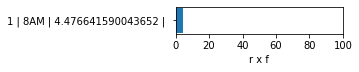

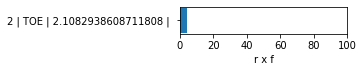

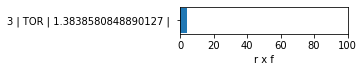

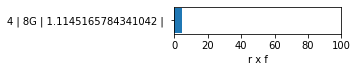

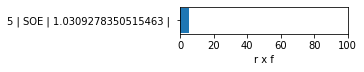

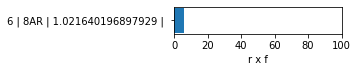

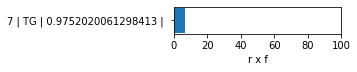

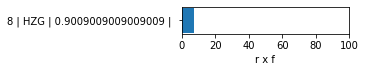

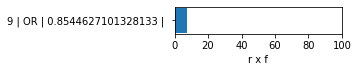

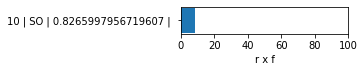

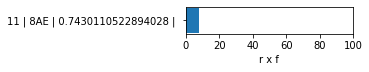

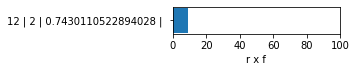

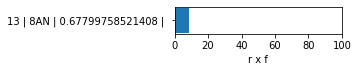

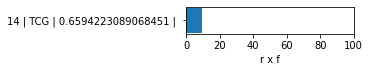

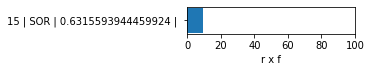

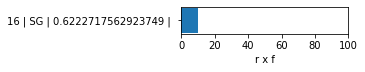

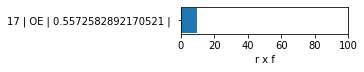

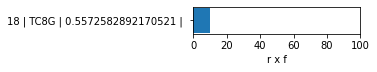

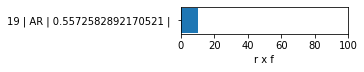

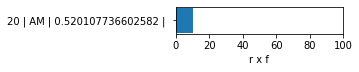

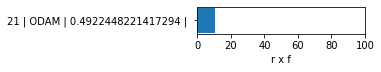

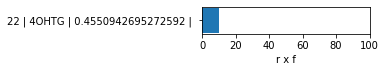

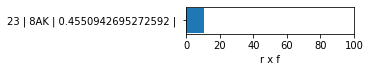

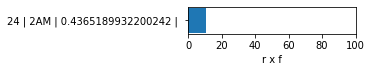

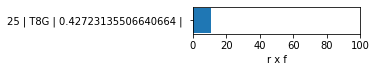

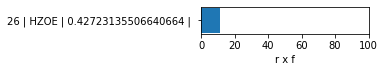

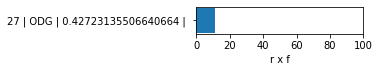

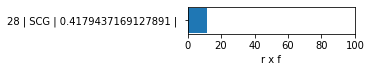

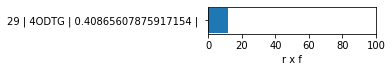

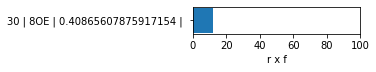

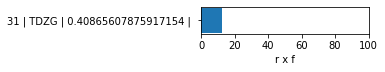

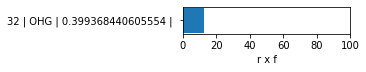

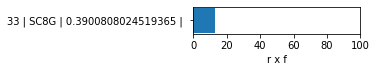

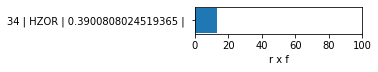

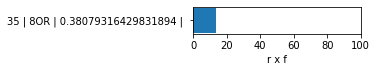

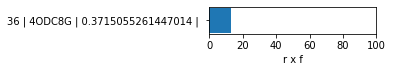

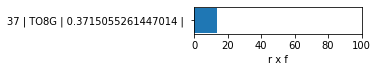

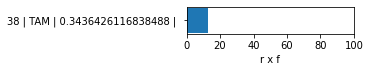

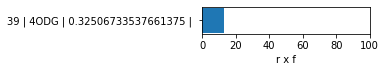

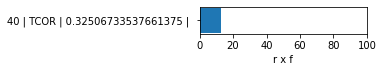

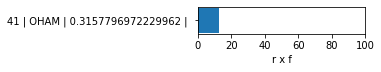

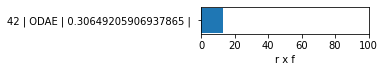

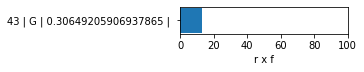

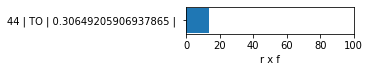

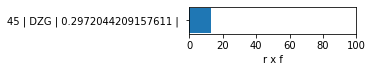

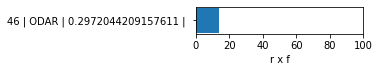

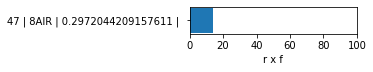

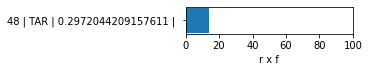

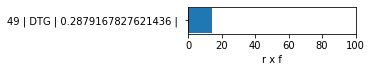

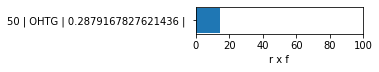

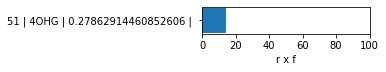

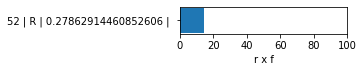

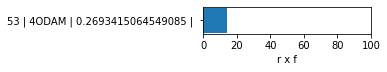

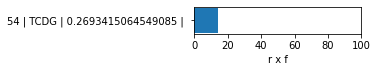

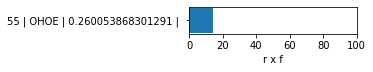

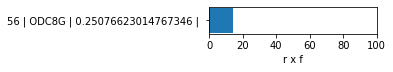

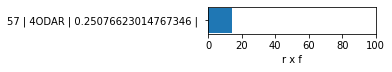

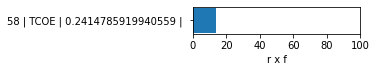

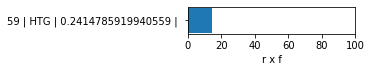

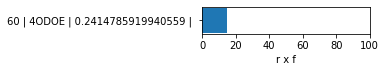

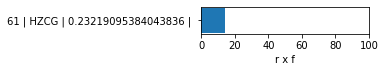

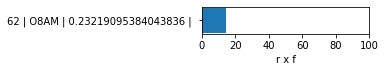

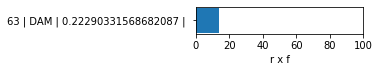

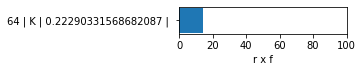

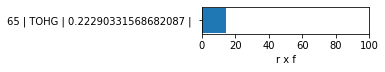

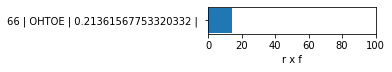

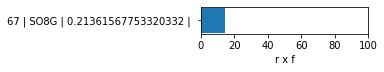

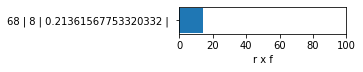

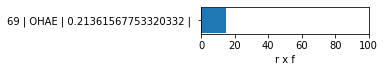

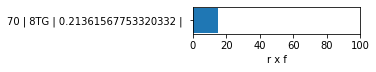

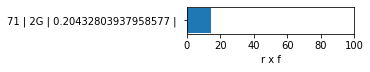

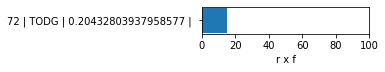

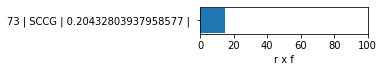

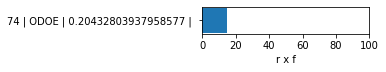

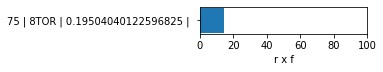

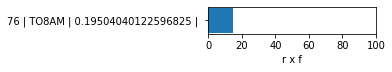

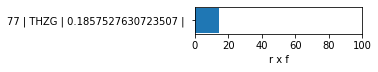

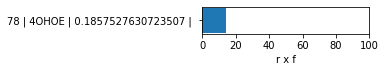

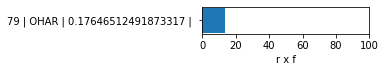

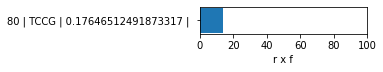

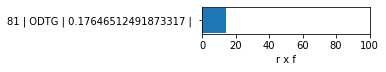

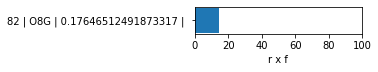

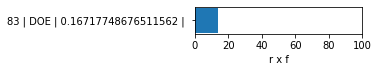

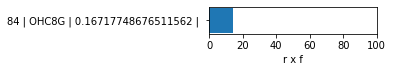

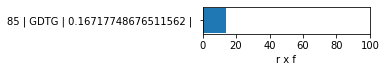

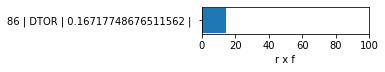

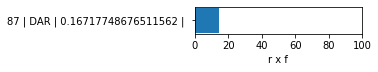

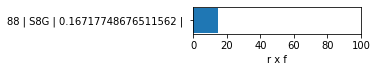

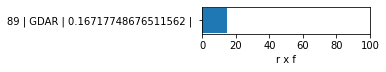

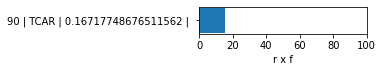

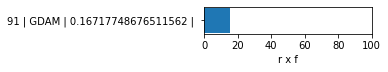

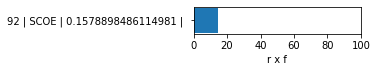

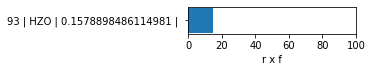

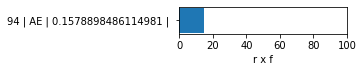

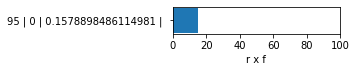

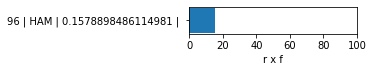

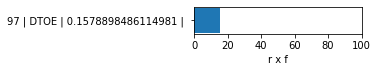

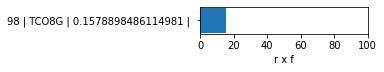

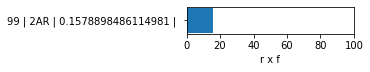

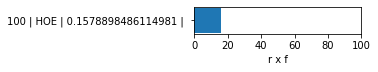

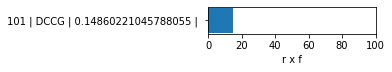

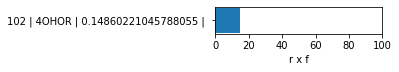

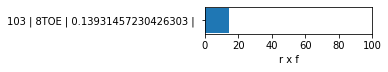

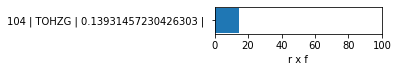

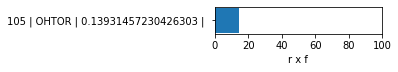

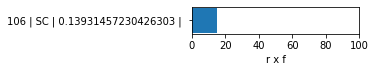

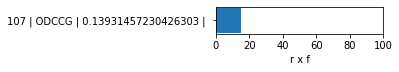

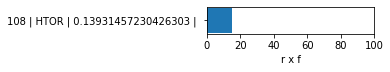

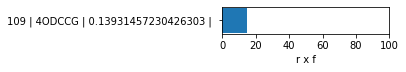

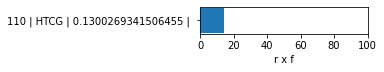

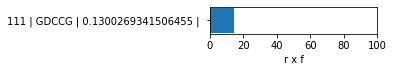

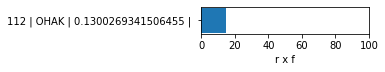

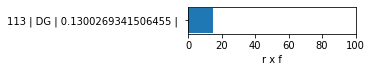

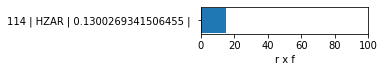

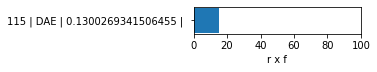

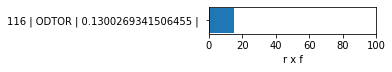

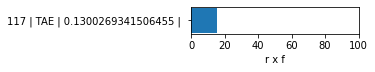

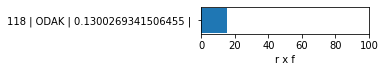

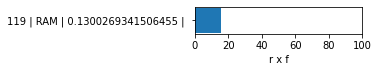

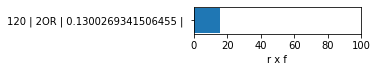

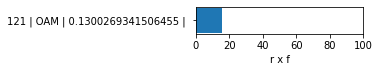

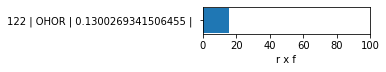

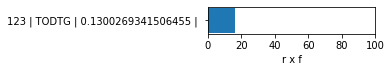

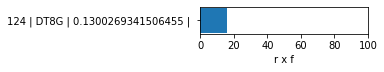

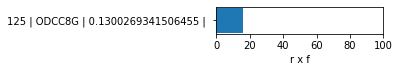

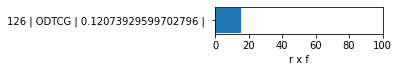

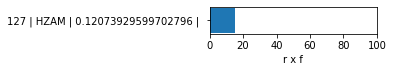

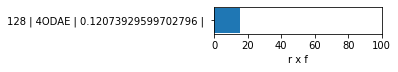

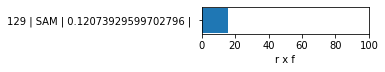

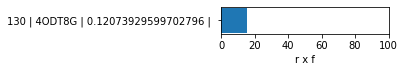

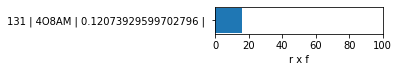

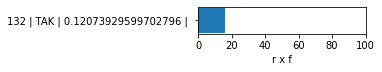

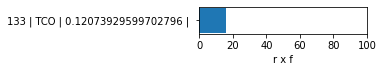

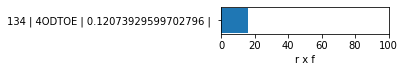

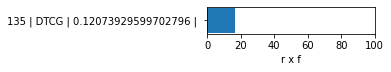

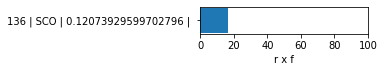

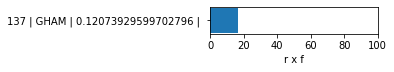

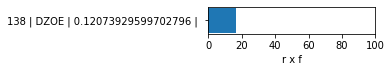

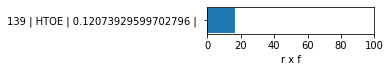

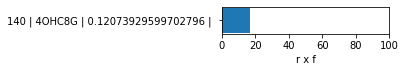

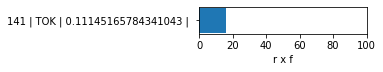

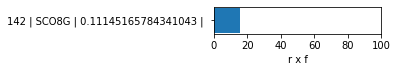

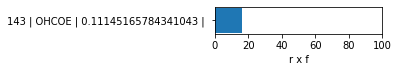

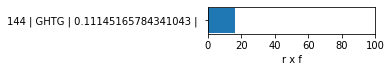

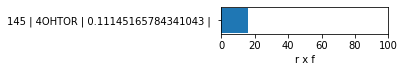

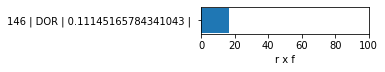

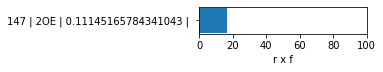

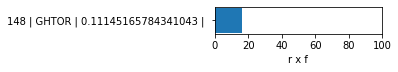

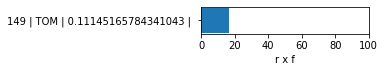

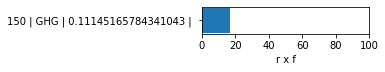

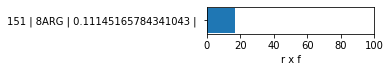

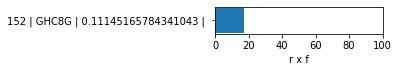

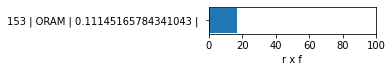

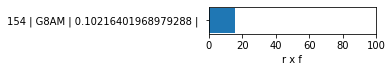

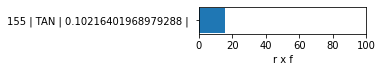

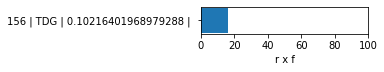

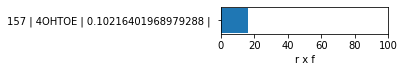

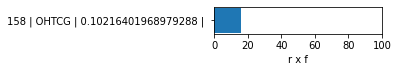

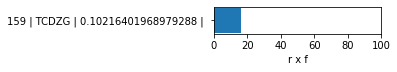

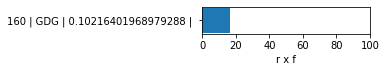

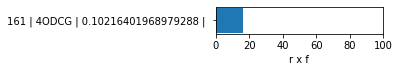

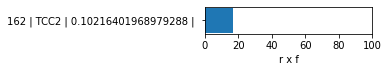

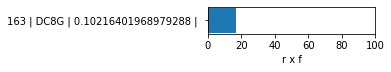

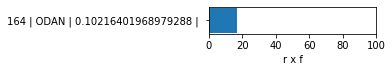

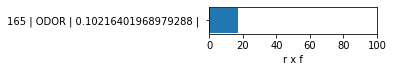

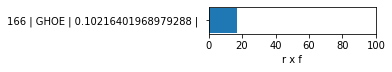

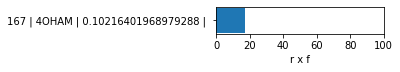

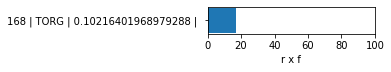

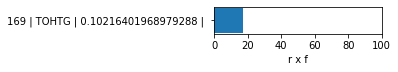

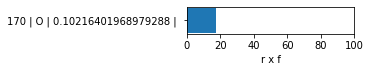

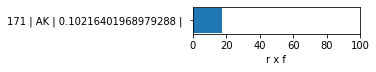

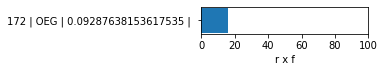

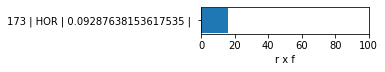

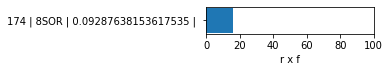

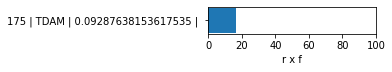

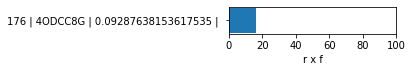

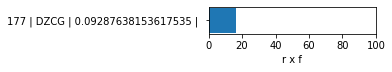

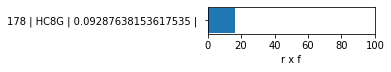

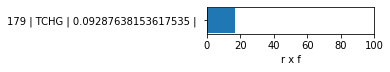

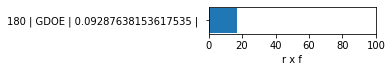

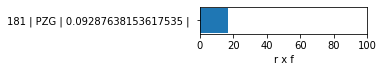

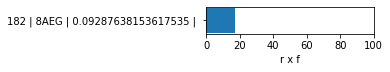

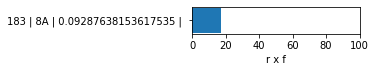

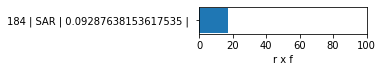

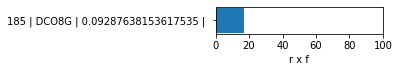

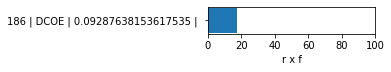

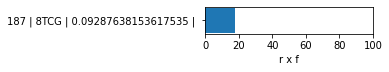

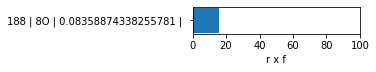

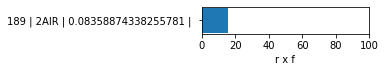

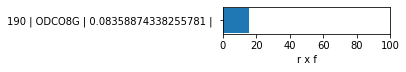

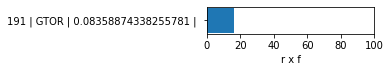

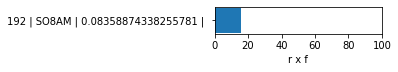

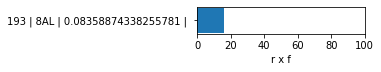

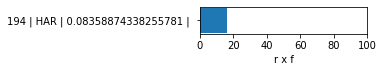

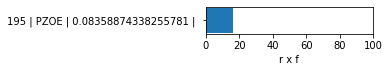

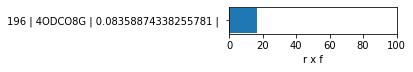

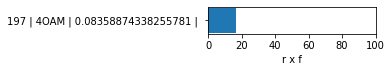

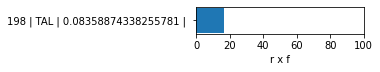

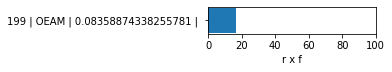

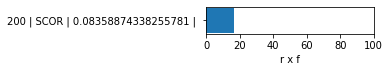

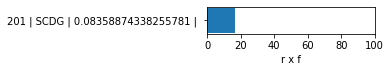

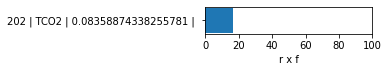

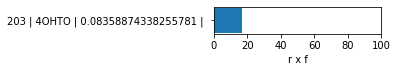

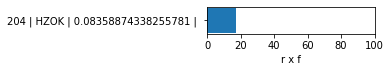

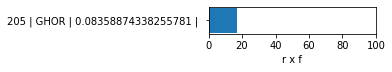

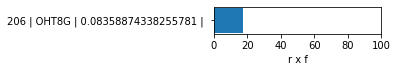

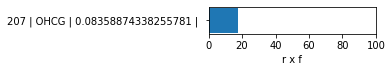

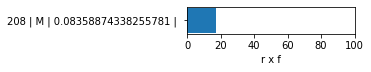

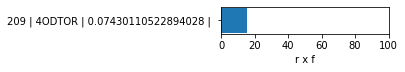

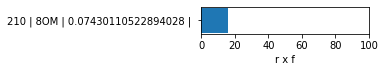

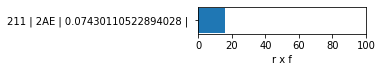

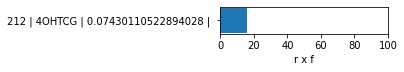

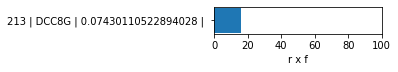

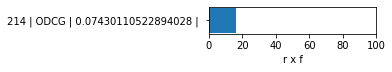

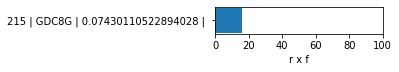

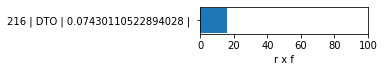

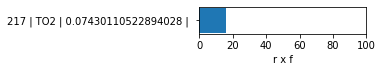

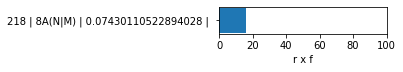

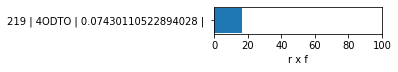

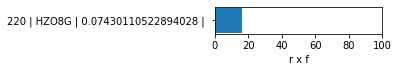

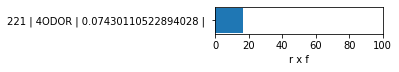

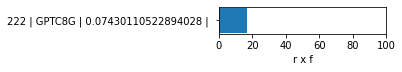

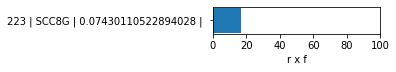

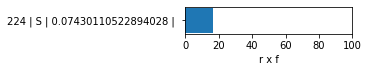

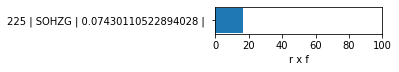

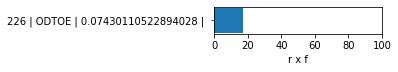

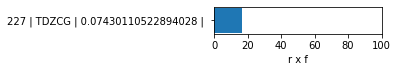

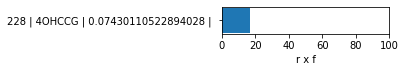

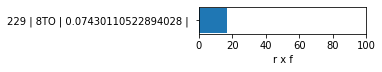

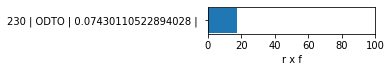

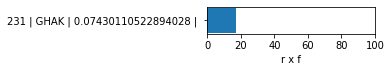

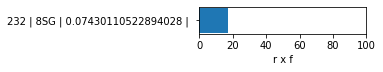

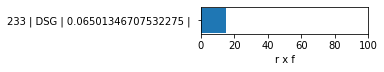

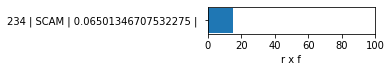

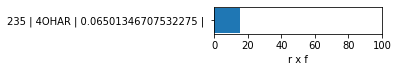

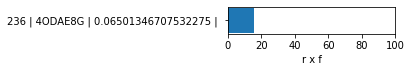

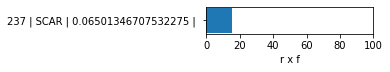

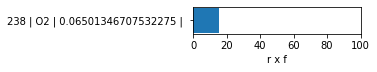

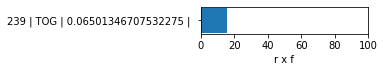

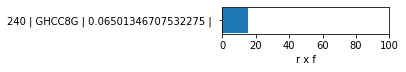

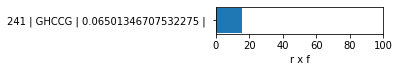

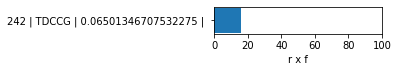

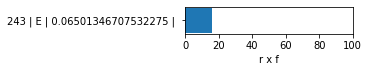

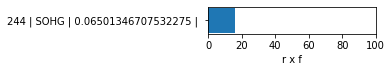

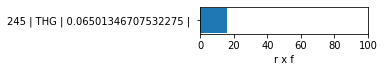

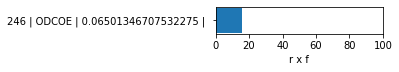

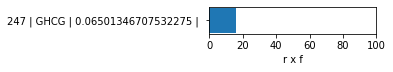

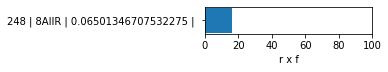

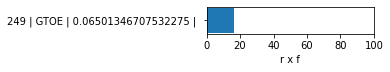

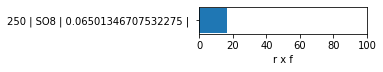

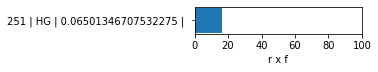

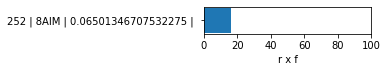

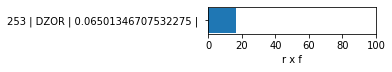

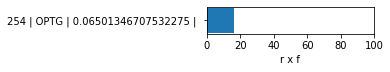

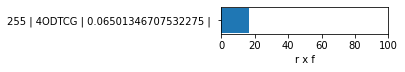

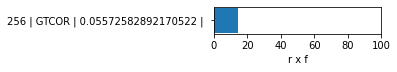

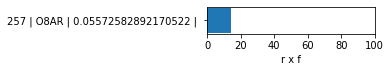

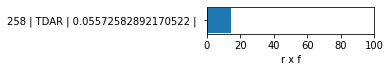

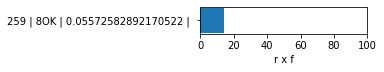

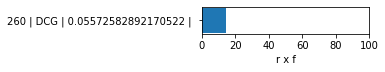

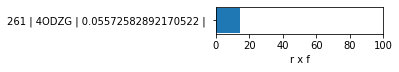

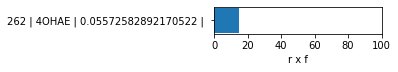

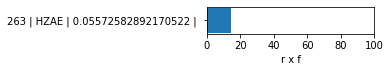

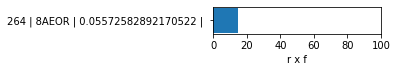

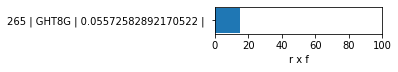

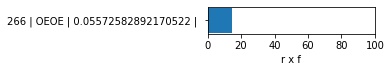

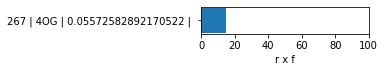

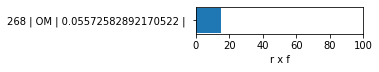

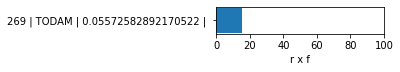

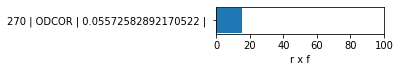

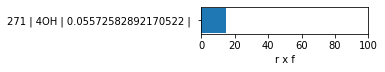

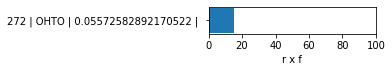

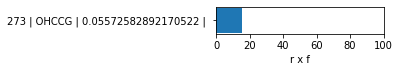

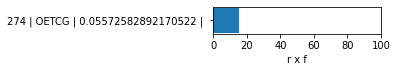

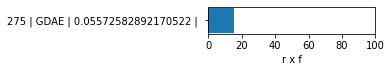

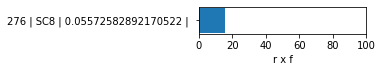

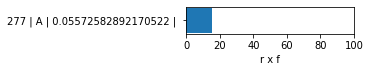

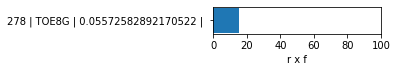

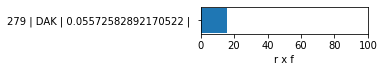

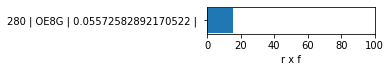

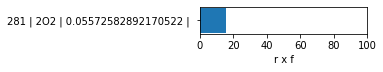

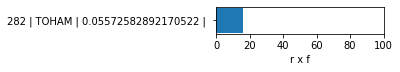

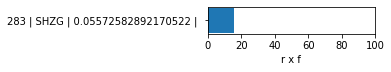

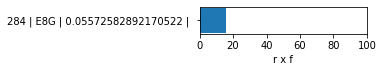

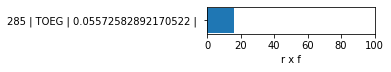

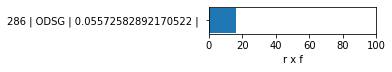

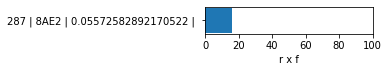

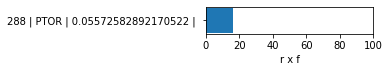

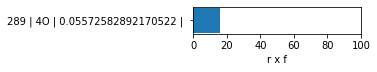

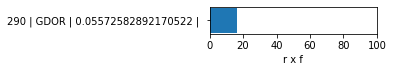

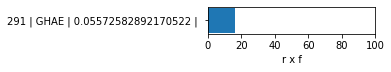

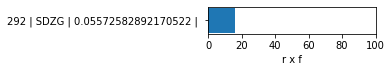

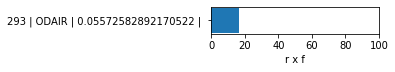

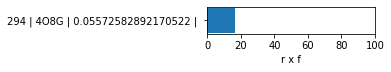

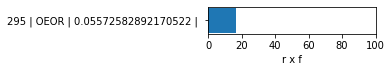

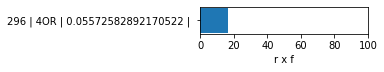

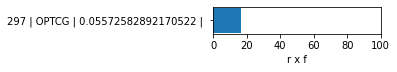

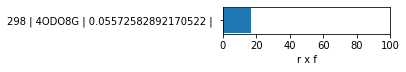

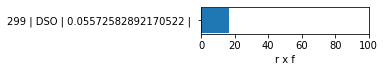

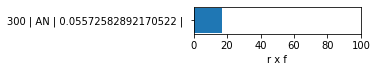

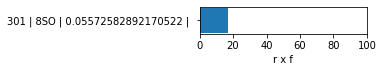

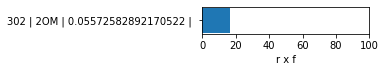

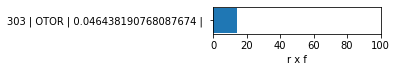

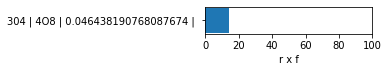

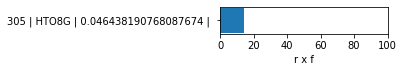

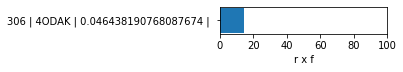

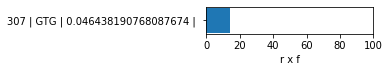

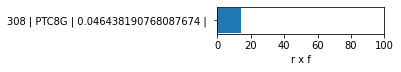

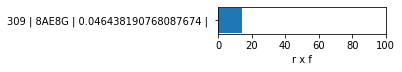

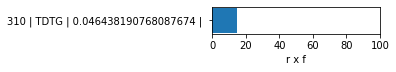

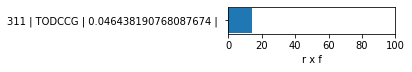

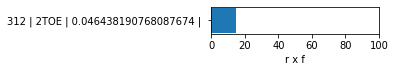

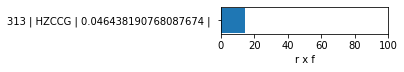

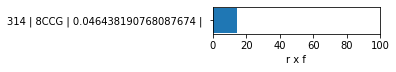

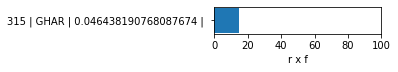

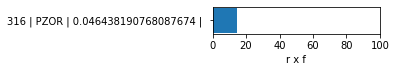

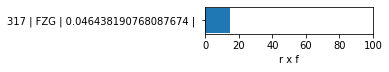

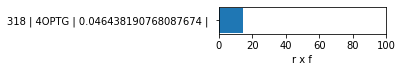

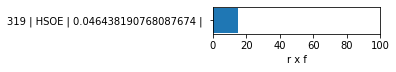

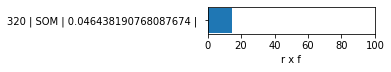

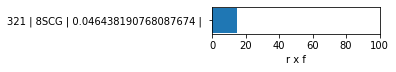

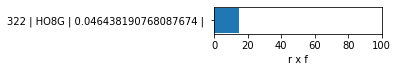

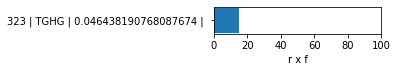

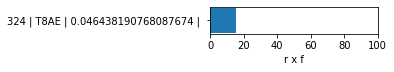

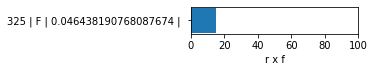

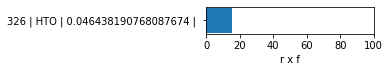

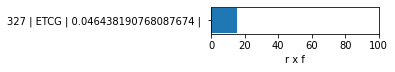

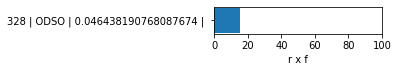

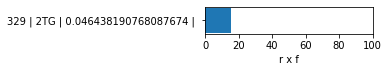

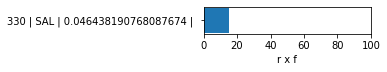

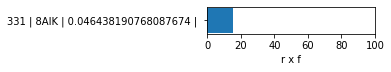

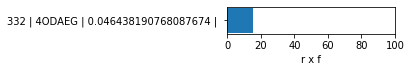

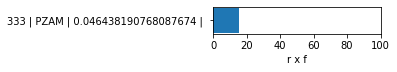

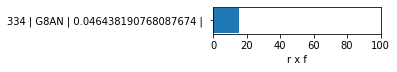

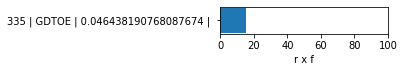

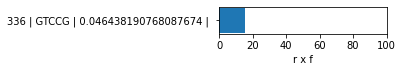

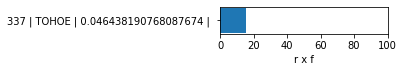

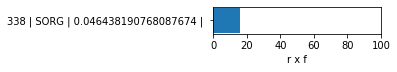

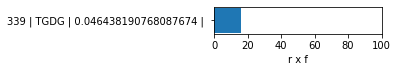

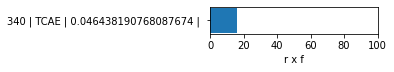

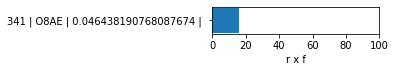

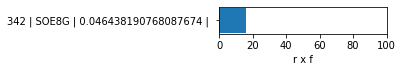

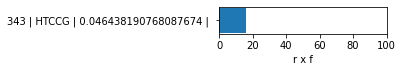

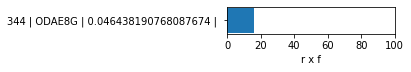

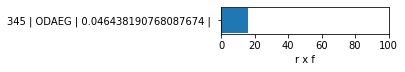

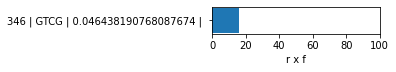

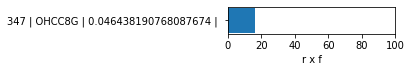

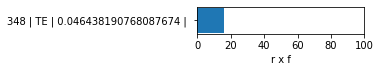

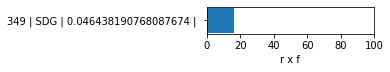

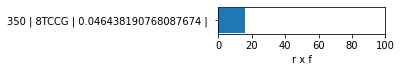

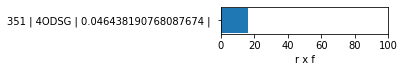

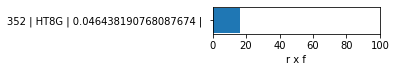

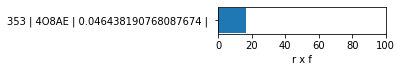

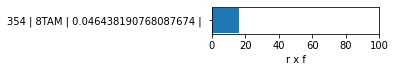

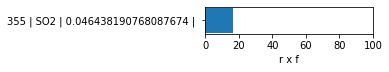

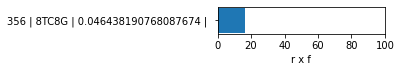

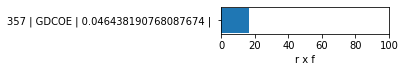

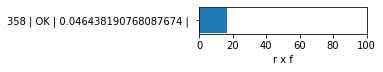

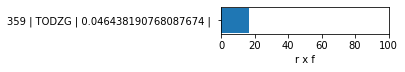

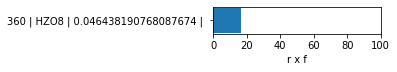

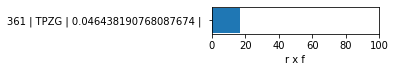

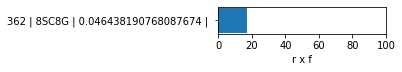

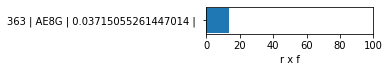

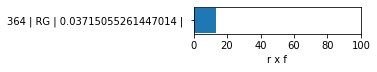

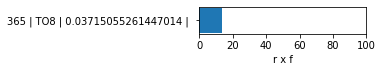

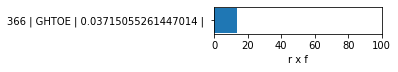

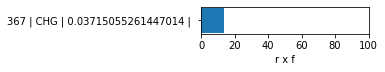

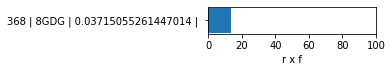

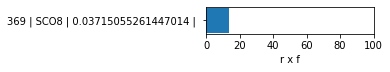

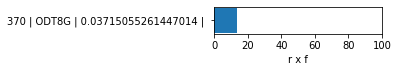

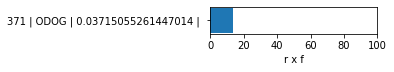

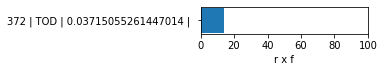

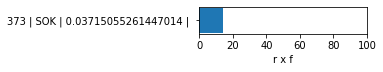

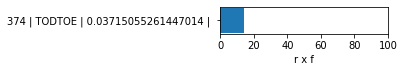

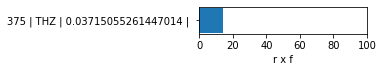

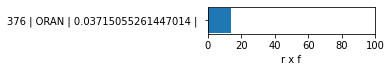

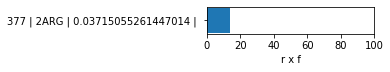

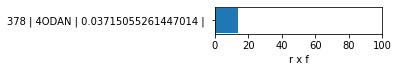

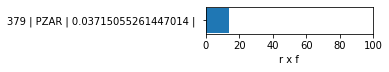

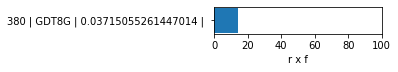

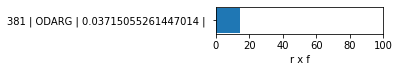

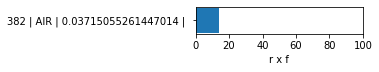

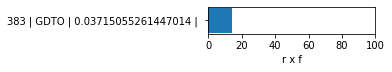

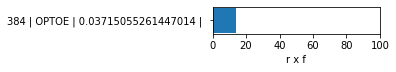

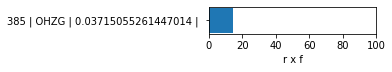

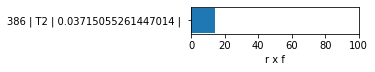

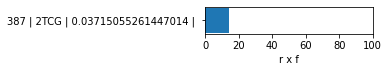

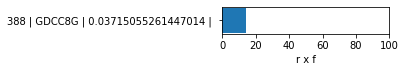

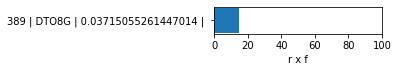

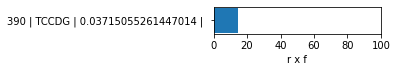

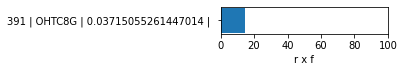

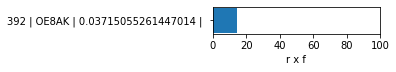

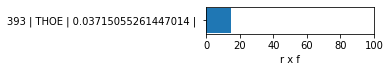

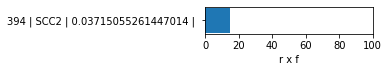

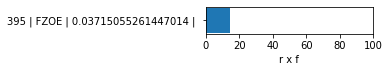

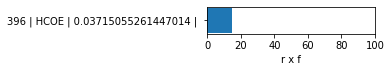

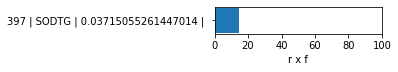

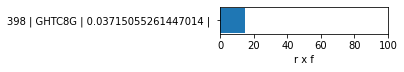

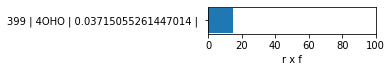

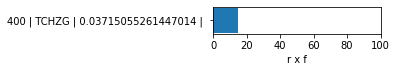

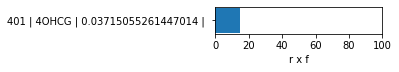

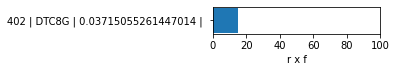

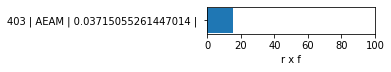

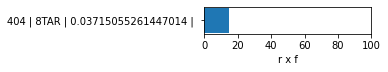

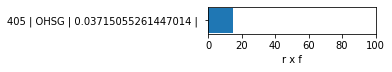

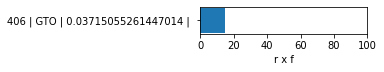

KeyboardInterrupt: ignored

<Figure size 216x36 with 0 Axes>

In [67]:

print("rank|word|ratio|chart")
for idx, (word, occurences) in enumerate(counted, 1):
  ratio: float = occurences/len(raw_text)*100
  y: List[str] = [f'{idx} | {word} | {ratio} | ']
  x = [idx * ratio]
  
  plt.figure(figsize=(3, 0.5))
  plt.barh(y, x)
  
  plt.xlim([0,100])

  plt.xlabel("r x f")
  plt.show()


**PUNKT 2**

Sąsiedztwo między wyrazami
Sąsiedztwo to dwa wyrazy do tylu i dwa wyrazy do przodu.
```
W porządku alfabetycznym
Wyr1.           Wyr1
Wyr2.           Wyr2
Wyr3.           Wyr3
Wyr4            Wyr4
Wyr5            Wyr5
```
I robimy strzaleczkami połączenia między wyrazami sąsiadującymi.

Powinien się znaleźć wyraz który ma znacznie dużo sąsiadów - to jest rdzeń języka.



In [68]:
# zrobienie listy unikalnych słow
lst_unique = []
for idx, (word, occurences) in enumerate(counted, 1):
  lst_unique.append(word)

# zrobienie listy unikalnych slow, ale ze spacją bo nie moze byc dwoch takich samych node'ow w grafie
lst_unique_space = []
for i in lst_unique:
  lst_unique_space.append(i+' ')

# dla kazdego wyrazu z listy lst_unique musimy znalezc ten wyraz w licie raw_text i do niego dopisac sasiadow
structure = []
counter = 0 
for i in lst_unique:
  structure.append([i])
  for j in range(len(raw_text)):
    if raw_text[j] == i:
      if( j - 1 >= 0 ):   structure[counter].append(raw_text[j-1])
      if( j - 2 >= 0 ):   structure[counter].append(raw_text[j-2])
      if( j + 1 <= len(raw_text)-1 ):   structure[counter].append(raw_text[j+1])
      if( j + 2 <= len(raw_text)-1 ):   structure[counter].append(raw_text[j+2])
  counter+=1

In [69]:

import networkx as nx
from networkx.algorithms import bipartite

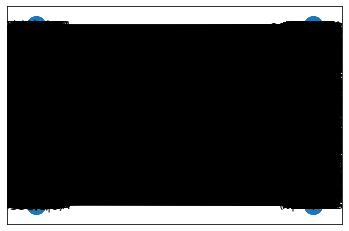

In [70]:


B = nx.Graph()
n = lst_unique
l = lst_unique_space

B.add_nodes_from(n, bipartite=0)
B.add_nodes_from(l, bipartite=1)

# zaprogramowac 
for i in structure:
  for j in range(len(i)):
    if j!=0: 
      B.add_edges_from([(i[0], i[j]+' ')])


bipartite.is_bipartite(B)

nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, n), width = 2)



# zrobione ALE
# zrobic żeby graf był duży i żeby było widać cokolwiek
# dać alfabetycznie node

**Punkt 3** : Analiza bigramów

Badać bigramy w ramach akapitów.
```
Wyr1 wyr2 wyr3 wyr4 wyr5 wyr6 ….

Pary sąsiadujących ze sobą wyrazów -2 sąsiednie.

Wyr1   wyr2      [ilosc wystąpień]
Wyr2   wyr3      [ilosc wystąpień]
Wyr3   wyr4      [ilosc wystąpień]
Wyr4   wyr5      [ilosc wystąpień]
```
W manuskrypie większość bigramów będą pojawiające się 1 raz.


